Import the relevant python modules required for the example: xarray and matplotlib

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

Specify the file to read in. In this case we are reading LST derived from MODIS AQUA, the data has been process to L3 and therefore has been reprojected to a regular grid (0.25 degrees in this example): 

In [6]:
esacci_lst_025 = "Data/ESACCI-LST-L3C-LST-MODISA-0.25deg_1MONTHLY_DAY-20060701000000-fv3.00.nc"

Open file using xarray (xr), the file will be read into a dataset (ds) structure:

In [7]:
ds = xr.load_dataset(esacci_lst_025)

We can display the data within the dataset easily:

In [8]:
ds

<xarray.Dataset>
Dimensions:          (time: 1, lat: 720, lon: 1440, length_scale: 1, channel: 2)
Coordinates:
  * time             (time) datetime64[ns] 2006-07-01
  * lat              (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon              (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * channel          (channel) float32 11.0 12.0
Dimensions without coordinates: length_scale
Data variables:
    dtime            (time, lat, lon) timedelta64[ns] NaT NaT NaT ... NaT NaT
    satze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    sataz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solze            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    solaz            (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst              (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_uncertainty  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_ran      (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_atm  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_loc_sfc  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    lst_unc_sys      (length_scale, lat, lon) float32 nan nan nan ... nan nan
Attributes: (12/41)
    title:                      ESA LST CCI land surface temperature data at ...
    institution:                University of Leicester
    source:                     ESA LST CCI MODISA L3C V3.00
    history:                    Created using software developed at Universit...
    references:                 https://climate.esa.int/en/projects/land-surf...
    tracking_id:                4d86dd7-ffa4-4c6a-8dca-21c2ba45f8d2
    ...                         ...
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    geospatial_lat_resolution:  0.25
    key_variables:              land_surface_temperature
    svn_version:                5771
    format_version:             CCI Data Standards v2.2

We can also plot the lst data directly (size and aspect are added here to make the image larger, but are not required):

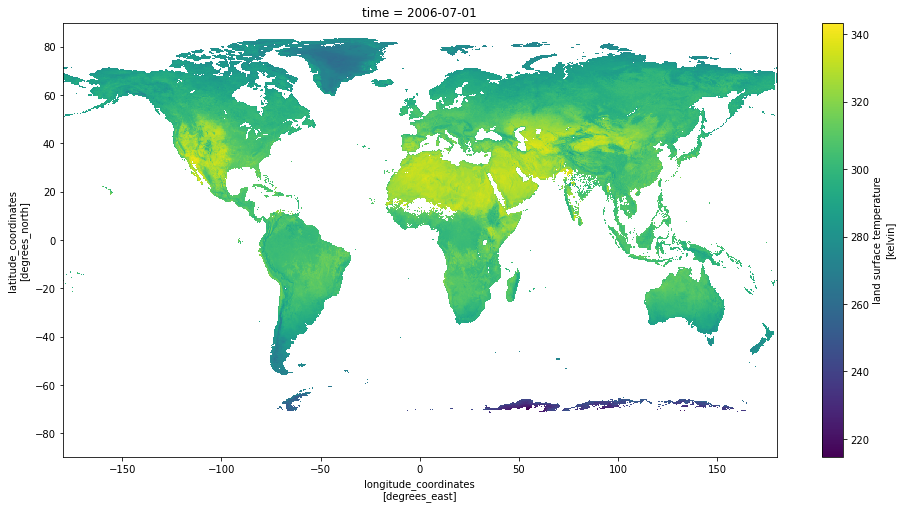

In [10]:
ds.lst.plot(aspect=2,size=8)

We can also look at the global distribution of LST:

''

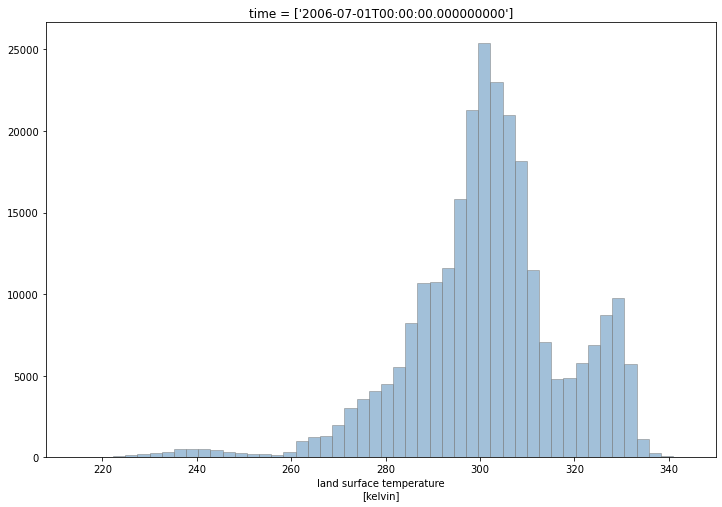

In [52]:
ds.lst.plot.hist(size=8,bins=50, alpha=0.5, color='steelblue',edgecolor='grey')
;

And we can look at specifc regions, first lets set our region of interest: 

In [35]:
lower_lon = 100.0
upper_lon = 150.0
lower_lat = 20.0
upper_lat = 70.0

Next we find the indexes in the dataset which bound this region:

In [41]:
lat_max_idx = (abs(ds.lat.values - upper_lat)).argmin()
lat_min_idx = (abs(ds.lat.values - lower_lat)).argmin()
lon_max_idx = (abs(ds.lon.values - upper_lon)).argmin()
lon_min_idx = (abs(ds.lon.values - lower_lon)).argmin()

Ready to go:

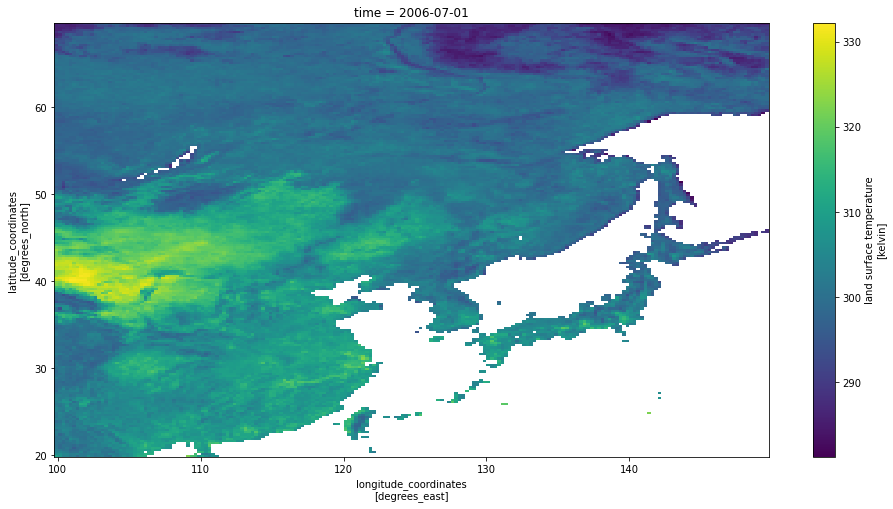

In [44]:
ds.lst.isel(lat=slice(lat_min_idx, lat_max_idx),lon=slice(lon_min_idx,lon_max_idx)).plot(aspect=2,size=8)

We can also run for transects:

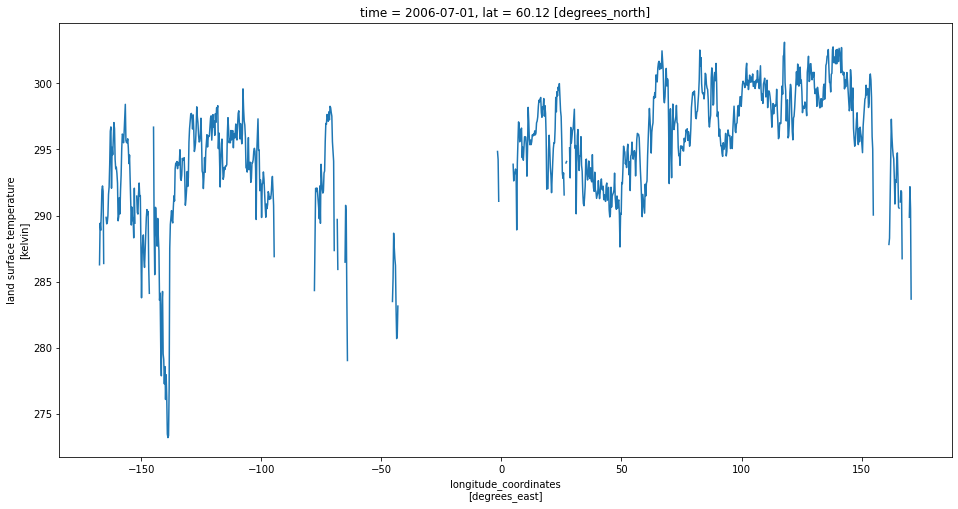

In [51]:
ds.lst[dict(lat=600)].plot(aspect=2,size=8)